<a href="https://colab.research.google.com/github/JoyChang10/Code/blob/main/Basic_Data_Analysis_Answer_Key.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Welcome to **Basic Data Analysis**. I will assume you know how to use `numpy` and `pandas`. Morever, I will assume you have previously taken Linear Algebra before (*e.g. Math 4A*), in particular I assume you are comfortable with vectors, matrices, linear systems, and diagonalization.

Optionally, it's nice to know probability and statistics (*e.g. PSTAT 120AB*) and multivariable calculus (*e.g. Math 6A*). I'll present some concepts from a statistical standpoint, and a big chunk of the linear classifier section will be optimization-heavy. Knowledge of data visualization packages such as `matplotlib` or `seaborn` is a plus, but also not necessary.

My intention with this document is for you to have it open on your computer during the whole workshop, and to fill it in with me as I go along.

**Press 'File' and 'Save a copy in Drive' to get started.** You cannot edit this document otherwise.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# What is "Basic" Data Analysis?

By basic data analysis, I really mean **any analysis that can be accomplished without machine learning**. This specific workshop will cover the following topics:
 - Linear Regression
 - Linear Classification
 - Principal Components Analysis

The first two produce models, while PCA is a data reduction technique. While a seemingly weird addition, PCA is pretty important to know since it vastly simplifies analysis.

But why focus on the basics when we can use ML? **Because basic data analysis is the foundation of more sophisticated data science!** A lot of ML models, for example, are built off of the ideas of linear regression and classification. It's impossible to go far in data science, especially machine learning, without being comfortable with the basics.

Also, it's nice to be able to solve problems without using machine learning, because, aside from being efficient and easy to implement, usually we can directly understand our outputs and how they were reached. A lot of advanced ML techniques aren't even fully understood by their own researchers.

# Linear Regression

Arguably the most important thing to take away from this workshop. We'll tackle the most common least squares approach and analyze some data with it.

## The Setup

Let's say we're interested in modeling a relationship between a **response** (dependent) variable $Y$ and a bunch of **explanatory** (independent) variables $X_1, X_2, \dots, X_p$. For example, we could try to find a relationship between
 - Response Variable: $Y = \text{traffic accidents in a day}$
 - Explanatory Variables: $X_1 = \text{average temperature}, X_2 = \text{day of the week}, X_3 = \text{month of the year}$

Mathmematically, we would say that we're trying to find a multivariable function $f$ such that

$$Y = f(X_1, X_2, \dots, X_p) + ϵ$$

Where $ϵ$ represents a small amount of error, since perfect relationships are often impossible (and to account for our measurement errors, e.g. using a ruler that's accurate up to inches). In other words, we want to model $Y$ as a function of $X_1, \dots, X_p$ plus a bit of error. This process of finding such an $f$ where the error is as small as possible is called **regression**.

**Linear regression** is when we only consider linear functions. That is, we say that

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p + ϵ$$

And the problem now amounts to finding the coefficients $\beta_0, \beta_1, \dots, \beta_p$ that make $ϵ$ as small as possible.

Even though the notation makes it looks like a simple equation, it's really a system of equations. Usually, you have some response data $\mathbf{Y} = (y_1, y_2, \dots, y_n)$, with each response $y_i$ having its corresponding explanatory data $(x_{i1}, x_{i2}, \dots, x_{ip})$. Note that I'm using lowercase to denote our data, while uppercase to denote the feature itself. Boldface will always refer to vectors/matrices.

You can then turn this into the following system of equations

\begin{align}
  y_1 &= \beta_0 + \beta_1 x_{11} + \beta_2 x_{12} + \dots + \beta_p x_{1p} + ϵ_1 \\
  y_2 &= \beta_0 + \beta_1 x_{21} + \beta_2 x_{22} + \dots + \beta_p x_{2p} + ϵ_2 \\
  &\vdots \\
  y_n &= \beta_0 + \beta_1 x_{n1} + \beta_2 x_{n2} + \dots + \beta_p x_{np} + ϵ_n \\
\end{align}

We can write this in terms of matrix multiplication

\begin{align}
  \begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_n
  \end{bmatrix}
  &=
  \begin{bmatrix}
    1 & x_{11} & x_{12} & \dots & x_{1p} \\
    1 & x_{21} & x_{22} & \dots & x_{2p} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{n1} & x_{n2} & \dots & x_{np} \\
  \end{bmatrix}
  \begin{bmatrix}
    \beta_0 \\
    \beta_1 \\
    \beta_2 \\
    \vdots \\
    \beta_p
  \end{bmatrix}
  +
  \begin{bmatrix}
    \epsilon_1 \\
    \epsilon_2 \\
    \vdots \\
    \epsilon_n
  \end{bmatrix} \\
  &\\
  \iff \mathbf{Y} &= \mathbf{X}\vec{\beta} + E \\
  \iff \mathbf{Y} &= \hat{\mathbf{Y}} + E
\end{align}

We will denote our predictions as $\hat{\mathbf{Y}}$ to distinguish it from our true values $\mathbf{Y}$. Also, notice that we included our constant coefficient $\beta_0$ into our data matrix $\mathbf{X}$ instead of grouping it with the error: the reason why will become apparent soon.

Our goal is to choose our $\vec{\beta}$ coefficients such that the error vector $E = (\epsilon_1, \epsilon_2, \dots, \epsilon_n)$ is as small as possible. That is, minimize the difference between our true vector $\mathbf{Y} = (y_1, y_2, \dots, y_n)$ and our predicted vector $\hat{\mathbf{Y}} = (\hat{y_1}, \hat{y_2}, \dots, \hat{y_n})$. But this begs a crucial question: what does it mean for a vector to be "as small as possible"? If it were a number then the answer is pretty straightforward, but we don't have that luxury. Another way to phrase this question is: *how do we even measure the size of a vector?*

There's many ways to define "as small as possible", but the most common is the **least squares** approach. The least squares approach says we should make its norm $||E||$ as small as possible. This is a reasonable approach because doing so minimizes the *distance* between the response vector $\mathbf{Y}$ and set of all possible prediction vectors $\hat{\mathbf{Y}}$ (which is just the span of the columns of $\mathbf{X}$!).


![Visual example](https://ocw.tudelft.nl/wp-content/uploads/E3P_projection-768x343.png)

*The least squares approach chooses the $\vec{\beta}$ coefficients such that the predicted vector $\hat{\mathbf{Y}}$ is as close to the true vector $\mathbf{Y}$ as possible. Notice that* Error = True - Predicted = $\mathbf{Y} - \hat{\mathbf{Y}}$

It's called the least squares approach because the $\vec{\beta}$ that minimizes $||E||$ also minimizes $||E||^2$, and

$$||E||^2 = (\epsilon_1)^2 + (\epsilon_2)^2 + \dots + (\epsilon_n)^2$$

So we're really minimizing the sum of squared errors. There's two nice ways to find the $\vec{\beta}$ coefficients

1. As the above picture suggests, take the point on the column space of our data matrix that's as close to $\mathbf{Y}$ as possible, then take the $\vec{\beta}$ coefficients that produces this value. You can accomplish this via [orthogonal projections](https://textbooks.math.gatech.edu/ila/projections.html)
2. Write out $||E||^2$ in terms of $\beta_0, \dots, \beta_p$. You will get:
  $$( y_1 - \beta_0  - \beta_1 x_{11} - \dots - \beta_p x_{1p} )^2 + \dots + ( y_n - \beta_0 - \beta_1 x_{n1} - \dots - \beta_p x_{np} )^2$$
  Treating this as a function of $\beta_0, \beta_1, \dots, \beta_p$ that we're trying to minimize, we take its gradient, set it equal to 0, then solve for the $\vec{\beta}$ coefficients. You'll get a linear system of equations that can be solved directly, and the answer will be the optimal $\vec{\beta}$

While these seem like different approaches, they will yield the same answer. Most computers implement some version of solution (1) since orthogonal projections are very easy to construct using the Singular Value Decomposition, however (2) is the most intuitive and straightforward to implement.

## Examples

To put all this theory into practice, let's construct a few linear models.

### 1D Input Example

Consider the following data

,X,Y
0,0.350239,-0.075207
1,-1.221352,-0.387807
2,0.918447,1.495574
3,0.929397,0.550676
4,-0.606894,-1.289611


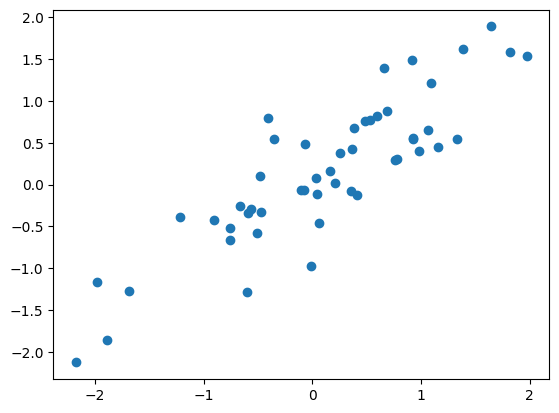

In [ ]:
# don't worry about what 'multivariate_normal' means, i just need to construct a dataset
number_of_points = 50
random_data = np.random.multivariate_normal(mean=np.zeros(2), cov=np.array([[1, 1.1], [1.1, 1]]), size=number_of_points, check_valid='ignore')

df = pd.DataFrame(data=random_data, columns=['X', 'Y'], index=np.arange(number_of_points))

plt.scatter(df['X'], df['Y'])
df.head()

We want to construct a model that looks like
$$ \hat{Y} = \beta_0 + \beta_1 X$$
We'll use $\hat{Y}$ to mean predicted value, and $Y$ to mean actual value, in order to distinguish between the two.

Fortunately, the package `sklearn` already implements all the math that computes the necessary coefficients, we just need to use it.

0.07140569406226792 [0.79541713]


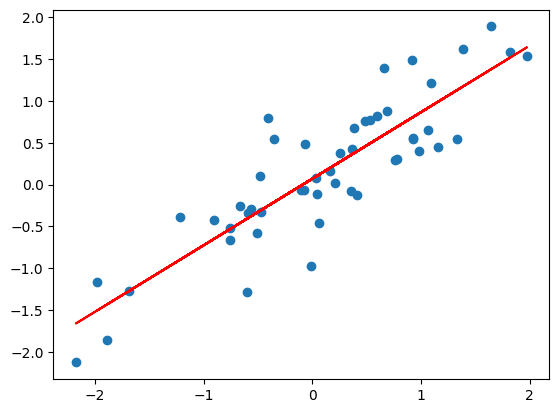

In [ ]:
from sklearn.linear_model import LinearRegression

X = df['X'].values.reshape(-1, 1)
Y = df['Y'].values

# input:
#     X = explanatory data matrix = [         Y = response vector = [
#                                     [X1]                            Y1
#                                     [X2]                            Y2
#                                     ...                             ...
model = LinearRegression().fit(X, Y)
print(model.intercept_, model.coef_)

plt.scatter(df['X'], df['Y'])
plt.plot(X, model.predict(X), color='red')
plt.show()

### 3D Input Example

Instead of using a single variable in this example, we're going to use 3. The model is just as easy to construct.

In [ ]:
from sklearn.datasets import load_diabetes

diabetes_data, target = load_diabetes(as_frame=True, scaled=False, return_X_y=True)
# see https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

print(diabetes_data.head())

X = diabetes_data[['age', 'bmi', 's6']].values
Y = target

diabetes_model = LinearRegression().fit(X, Y)

# input: age, bmi, s6 (blood sugar)
# output: disease progression
print(diabetes_model.predict([[60, 30, 160]]))


    age  sex   bmi     bp     s1     s2    s3   s4      s5    s6
0  59.0  2.0  32.1  101.0  157.0   93.2  38.0  4.0  4.8598  87.0
1  48.0  1.0  21.6   87.0  183.0  103.2  70.0  3.0  3.8918  69.0
2  72.0  2.0  30.5   93.0  156.0   93.6  41.0  4.0  4.6728  85.0
3  24.0  1.0  25.3   84.0  198.0  131.4  40.0  5.0  4.8903  89.0
4  50.0  1.0  23.0  101.0  192.0  125.4  52.0  4.0  4.2905  80.0
[266.07417355]


Unfortunately we can't visualize this, since the inputs are 3 dimensional and outputs are 1 dimensional, 4 dimensions total.

### Polynomial Regression

As we saw in the 1D example, usually a line is good enough for our data. However, suppose you have data that looks like this

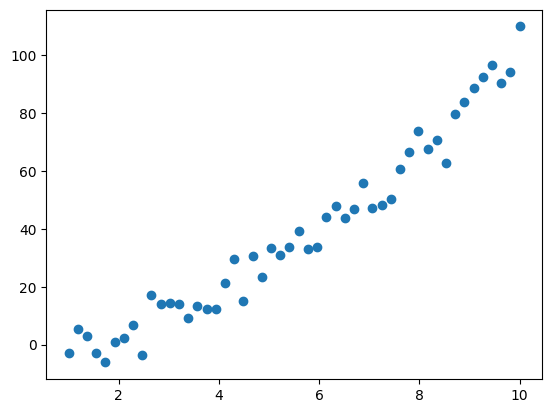

In [ ]:
X_train = np.linspace(1, 10, num=50).reshape(-1, 1)
Y_train = X_train**2 + np.random.normal(loc=0, scale=5, size=50).reshape(-1, 1)

plt.scatter(X_train, Y_train)
plt.show()

It seems like a polynomial curve instead of a straight line would better fit this data. That is, we should use a model that looks like

$$ \hat{Y} = \beta_0 + \beta_1 X + \beta_2 X^2 + \dots + \beta_k X^k $$

Notice that this is linear for the $\beta$ coefficients. Moreover, we know what $X$ is, so we can easily figure out $X^2, X^3, \dots, X^k$. Hence we can use linear regression to find this best-fit polynomial (in terms of least squares).

Technically we would need to construct a new dataset by manually computing $X^2, \dots, X^k$ for all of the explanatory data, however there's no need: `sklearn` does this for us if we tell it to.

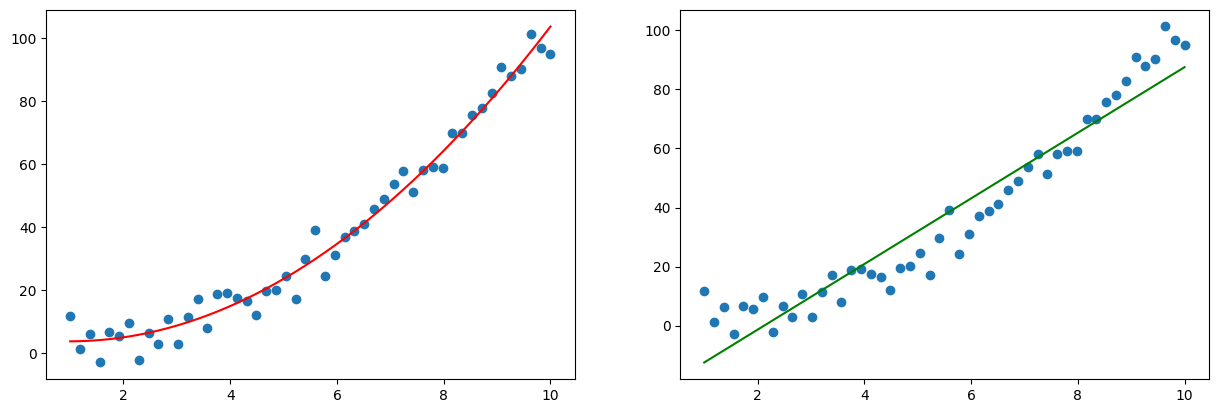

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

X_train_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train) # include_bias prepends 1s to your data (for the constant coefficient).
# the LinearRegression.fit method already does this for you; no need to do it twice.

poly_model = LinearRegression().fit(X_train_poly, Y_train)
linear_model = LinearRegression().fit(X_train, Y_train)

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(15)
axes[0].scatter(X_train, Y_train), axes[1].scatter(X_train, Y_train)
axes[0].plot(X_train, poly_model.predict(X_train_poly), color='red')
axes[1].plot(X_train, linear_model.predict(X_train), color='green')
plt.show()

## Evaluating our Models

Even though we can construct many models, how do we choose the best one? Let alone: how can we tell whether a model is good? Thus, it's important to have some notion of comparing models, some way to **evaluate** them.

As a general rule of thumb, you should split your data into two datasets, called the train and test data. As the names suggest, the training data is what you input to find the coefficients, whereas the testing data is something the model has never seen before.

**It's important to score your model over its training and testing data, and then compare the two**. A good model should have these scores pretty close to each other.

Only testing a model on data it has seen before is a one-way road to *overfitting*, meaning **your model might be so good at predicting its training data that it's effectively useless for outside data**, a phenomenon known as *overfitting* (you model your data so well that you start predicting completely random and unmeasurable noise, which is absurd!).

sklearn provides the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method that will do this for you, at a ratio of 75% Train and 25% Test (you can change this, of course). We won't need to use it in this workshop though since we already know the probability distributions we're sampling from, so we can just take more samples to produce testing data.

### The $R^2$ Score

The $R^2$ score is a measurement of how well your explanatory data predicts your response data. Intuitively, it represents how much response variance is predictable by input variance. Mathematically, it's given by the square of the correlational coefficient (or in the case of multiple inputs, coefficient of multiple correlation).

The $R^2$ score ranges between 0 and 1; a score of 1 means a strong linear relationship, while a score of 0 indicates no (linear) relation.

In [ ]:
X_test = np.linspace(1, 11, num=15).reshape(-1, 1) # want to change the points we tested on
X_test_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_test)
Y_test = X_test**2 + np.random.normal(loc=0, scale=5, size=15).reshape(-1, 1)

print('Linear Train Score:', linear_model.score(X_train, Y_train))
print('Poly Train Score:', poly_model.score(X_train_poly, Y_train))
print('Linear Test Score:', linear_model.score(X_test, Y_test))
print('Poly Test Score:', poly_model.score(X_test_poly, Y_test))

Linear Train Score: 0.9166377775687314
Poly Train Score: 0.9796742152176249
Linear Test Score: 0.8943997893593333
Poly Test Score: 0.9722739507435445


Naively, the higher the score the better, but ironically high $R^2$ can lead to really bad models. High $R^2$ scores on your training data is a good indicator that your model is overfitting. It's very important to score your model on testing (unseen) data as a result, as we did above.

In this example, both our train and test scores are really good because I designed the distribution to behave this way; in the real world, this isn't the case most of the time. A high $R^2$ score (e.g. above 0.95) is probably a red flag, and should remove one of your features from your model (or scrap it altogether) to prevent overfitting.

And also, the $R^2$ score has questionable efficiency. As simple as it is, it's imperfect. In fact, it has a lot of pitfalls and can be very misleading. It's one of those things you use when there's no apparent alternative. [This](https://stats.stackexchange.com/questions/13314/is-r2-useful-or-dangerous?noredirect=1&lq=1) stack overflow page goes into more detail. However, it's incredibly ubiquitous, and a good metric to keep in mind.

### Mean Squared Error

The **mean squared error** is simply $\frac{1}{n} \cdot ||E||^2$, i.e. the square of the norm of our error vector, divided by the number of samples we fed into the model. A seemingly weird choice, but recall that this is related to the value we minimized when finding the best coefficients. It's called mean squared error because it represents how much squared error we can expect from a typical prediction (*recall: mean = expectation*). It has a lot of nice mathematical and statistical properties, in particular $\mathrm{MSE} = \mathrm{Variance} + \mathrm{Bias}^2$. There's a lot more, however we won't go into them.

Thankfully, `sklearn` already has a built in way to compute MSE.

In [ ]:
from sklearn.metrics import mean_squared_error
# mean_squared_error(true values, predicted values)


print('Linear Train MSE:', mean_squared_error(Y_train, linear_model.predict(X_train)))
print('Poly Train MSE:', mean_squared_error(Y_train, poly_model.predict(X_train_poly)))
print('Linear Test MSE:', mean_squared_error(Y_test, linear_model.predict(X_test)))
print('Poly Test MSE:', mean_squared_error(Y_test, poly_model.predict(X_test_poly)))

Linear Train MSE: 78.88939696848287
Poly Train MSE: 19.23519860227815
Linear Test MSE: 172.0953450648793
Poly Test MSE: 45.1847963666659


Notice that this value is in units of **squared error**, not error. For a measurement in units of error, check out [root mean squared error](https://scikit-learn.org/dev/modules/generated/sklearn.metrics.root_mean_squared_error.html). When you're doing your analysis, usually you'll stick with MSE, however RMSE is useful if you need an interpretable error measurement (kind of how like variance is statistically more useful than standard deviation, but standard deviation is in units we can directly interpret).

A big pitfall of mean squared error, and least squares in general, is that it's **very sensitive to outliers**. There are ways to avoid this, for example by instead using [median absolute error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.median_absolute_error.html#sklearn.metrics.median_absolute_error), however this has its own issues: it may flag a model as good that turns out to accurate 60% of the time (equivalently, 40% of your predictions are totally wrong). Preprocessing for outliers is crucial as a result.

There's many other metrics I would love to cover, however to prevent this workshop from running for a very long time, I will only link them as further reading. [Here's](https://www.scribbr.com/statistics/akaike-information-criterion/) [a few](https://medium.com/@analyttica/what-is-bayesian-information-criterion-bic-b3396a894be6) [for the curious](https://scikit-learn.org/stable/modules/cross_validation.html).

# Linear Classification

Regression gives us a way to predict response variables, however oftentimes this isn't what we want. Instead of predicting outputs, sometimes we simply want to assign labels, such as

- Determine the breed of a dog based on a picture
- Reject/accept the null hypothesis
- Classify a text message as safe or toxic

There's hundreds of examples, but this process of assigning labels to our data is called **classification**.

Before we go farther, we will make two assumptions

1. We can represent our labels as numbers (e.g. Safe = 0, Toxic = 1)
2. The data we're given are already represented as vectors. That is, our data is already **vectorized**.

(1) is usually very straightforward to solve, but (2) is a pain. Depending on the complexity of your data, you'll probably need some form of machine learning. However, such topics are beyond the scope of this workshop, and we will assume that our data is in vector form.


## The Setup

A **classifier** is a function $f$ that sends a vector to a pre-determined list of numbers, which represent our labels. For example, the following sends $\mathbb{R}^2$ to either $\{0, 1\}$

\begin{align}
  f(x, y) = \begin{cases}
  1 &\text{if }\, x^2 - y > 1 \\
  0 &\text{if } \, x^2  - y \leq 1
  \end{cases}
\end{align}

![classifer_example.png](https://drive.google.com/uc?export=view&id=1Ho4ENpUpAd18Cggw7N0I7TqCdBFVHoZf)

*The blue region is all the vectors that get sent to 1, while the red region is all the vectors that get sent to 0*

We call $f$ our **decision function**, or **decision rule**, since it decides what label the vector should be classified as.

A **linear** classifier is a decision function that bases its decisions on linear combinations of the features. Most commonly, they take the form

$$ f(\vec{x}) = \delta(\vec{\omega} \cdot \vec{x}) $$

Where $\delta$ is a threshold rule: is the input larger than a certain number. We call $\vec{\omega}$ the **weight** vector of our classifier, and the input into the decision rule is called a **logit** (a weird name, but the reason why will be explained shortly). Another common name for logit is **raw score**, though most literature sticks with logit. The problem now amounts to choosing a good decision rule AND weight vector.

## Binary Classification

First we want to start with the most simple case of only two labels: $\{0, 1\}$. We will use the following decision rule

\begin{align}
  f(\vec{x}) = \begin{cases}
    1 &\text{if } \, \vec{\omega} \cdot \vec{x} + \omega_0 \geq 0 \\
    0 &\text{if } \, \vec{\omega} \cdot \vec{x} + \omega_0 < 0
  \end{cases}
\end{align}

Where $\omega_0$ represents a threshold value (the **bias**) defining the decision rule. We need to figure this out along with our weights.

While this decision rule seems like a very weird choice, it has a nice and simple meaning: **this says that you're on one of two sides of a line/plane!** The line/plane that divides the input space is called the **decision boundary**. Note that the decision boundary is given by all the $\vec{x}$ that satisfy $\vec{\omega} \cdot \vec{x} + \omega_0 = 0$ (That is, the decision boundary is all the vectors whose logit is 0.)

![classification](https://scipython.com/static/media/uploads/blog/logistic_regression/decision-boundary.png)

*Linear classification in action. The decision boundary is the black dotted line.*

One naive solution goes like so: we try to have the logits be as close to the labels as possible. We will work through this because it feeds nicely into the true solution (and because this is how most Python libraries will want the inputs formatted).

If we know that the data $\vec{X}_i = (x_{i1}, x_{i2}, \dots, x_{ip})$ has the corresponding label $y_i$, we can try to find optimal weights by solving the system of equations

\begin{align}
  y_1 &= \omega_0 + \omega_1 x_{11} + \omega_2 x_{12} + \dots + \omega_p x_{1p} + \epsilon_1 \\
  y_2 &= \omega_0 + \omega_1 x_{21} + \omega_2 x_{22} + \dots + \omega_p x_{2p} + \epsilon_2 \\
  &\vdots \\
  y_n &= \omega_0 + \omega_1 x_{n1} + \omega_2 x_{n2} + \dots + \omega_p x_{np} + \epsilon_n \\
\end{align}

As before, an exact solution is usually impossible, so we add an error vector $E = (\epsilon_1, \epsilon_2, \dots, \epsilon_n)$. However, we have to return to the fundamental question of: how do we measure our error vector $E$? We will get to this shortly.

Writing our system in terms of matrix multiplication:

\begin{align}
  \begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_n
  \end{bmatrix}
  &=
  \begin{bmatrix}
    1 & x_{11} & x_{12} & \dots & x_{1p} \\
    1 & x_{21} & x_{22} & \dots & x_{2p} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{n1} & x_{n2} & \dots & x_{np} \\
  \end{bmatrix}
  \begin{bmatrix}
    \omega_0 \\
    \omega_1 \\
    \omega_2 \\
    \vdots \\
    \omega_p
  \end{bmatrix}
  +
  \begin{bmatrix}
    \epsilon_1 \\
    \epsilon_2 \\
    \vdots \\
    \epsilon_n
  \end{bmatrix} \\
  &\\
  \iff \mathbf{Y} &= \mathbf{X}\vec{\omega} + E \\
\end{align}

I'm technically abusing notation by including $\omega_0$ in our weight vector, however doing so vastly simplifies this process. To simplify things, hereinafter we'll include $\omega_0$ as part of our weights, and to address this we'll add a 1 to the front of our data (i.e. now,
$\vec{\omega} = (\omega_0, \omega_1, \dots, \omega_p)$ and $\vec{X}_i = (1, x_{i1}, \dots, x_{ip}$)).

### Choosing a new error measurement

A naive solution is to use the least squares approach and minimize $||E||^2$, however this won't work too well. We only care about whether the logit $\omega_0 + \omega_1 X_{i1} + \omega_2 X_{i2} + \dots + \omega_p X_{ip}$ is positive or negative, since that's what our decision rule is based off of. Another way to put it: **the sign of the error is more important than its size!** Squaring our error will completely neglect the sign, which isn't what we want.

To put this in machine learning jargon, **the squared loss function is not optimal for this problem.** By *loss function*, I really mean how we're measuring error, how we're quantifying our *loss* of being incorrect. So we'll need to come up with a new loss function, another way of measuring error.

Instead of minimizing the norm, **we will maximize the probability of assigning the correct label**. But to do this, we need some way to convert logits into a probability.

A good candidate for this is the *sigmoid function*

$$ \phi(z) = \frac{1}{1 + e^{-z}} = \frac{1}{1 + \exp(-z)}$$

![logistic function](https://media.licdn.com/dms/image/D4D12AQGIXdSG7IJCNw/article-cover_image-shrink_600_2000/0/1694183259537?e=2147483647&v=beta&t=OtnfeqwCtKTSVrdKZdyOzNYECyLLZuEUIxkTfTQ0dS0)

This is good for our decision rule for 2 reasons (among others, but less important for us)
1. $\phi$ only outputs numbers between 0 and 1, so this is a good way to convert to probability.
2. If the score is positive, then $\phi$ spits out a number greater than 1/2. For negative scores, $\phi$ spits out a number less than 1/2. We can therefore interpret the outputs of $\phi$ as **the probability that 1 is the correct label.**

### Why are they called logits?

Let $p$ be the probability of assigning the correct label for the vector $\vec{x}$. From our work above, we have that

$$ p = \frac{1}{1 + \exp(-\vec{\omega} \cdot \vec{x})}$$

Logit is short for **Log**istic Un**it**. The word logistic comes from the fact that the sigmoid function is commonly called the *logistic* function by statisticians, and the inputs are in units the logistic function can interpret (hence the name **logit**). It's very common to see statistical language in ML jargon. (Although both fields still maintain different names, like statisticians use *logistic* function, while people in ML use *sigmoid* function. I honestly can't tell you why.)

### Finding the weights

Now that we have a probability, a good candidate for our optimal weights is the [maximum likelihood estimator](https://www.statistics.com/glossary/maximum-likelihood-estimator/) (MLE), which maximizes the probability of seeing this specific data.

For ease, let's denote the MLE as $\omega^*$. First, we consider the [likelihood function](https://www.statisticshowto.com/likelihood-function-definition/) of our data

$$ \mathcal{L}(\vec{\omega}) = \prod_{i=1}^{n} \phi(\vec{\omega} \cdot \vec{X}_i)^{y_i} \, (1 - \phi(\vec{\omega} \cdot \vec{X}_i))^{1 - y_i}$$

This looks scary, but this is just multiplying all the probabilities together (recall that $y_i = 0 \text{ or } 1$, so one of the terms is gonna be raised to the power of 0 and contribute nothing!).

We can find the MLE by taking the gradient of the likelihood (with respect to our weights) and performing something like gradient descent. Doing so directly is a pain, but fortunately, we can take the logarithm. Since $\log$ is increasing it won't change the MLE.

(Recall that $\log$ turns products into sums. So $\log(\prod_{i=1}^{n} A_i) = \sum_{i=1}^{n} \log(A_i)$)

$$ \log \mathcal{L}(\vec{\omega}) = \sum_{i=1}^{n} y_i \log\phi(\vec{\omega} \cdot \vec{X}_i) + (1 - y_i) \log(1 - \phi(\vec{\omega} \cdot \vec{X}_i))$$

The input that maximizes $\log\mathcal{L}$ is equal to the input that **minimizes** $-\log\mathcal{L}$. In other words,

$$ \mathrm{argmax}\, [\log\mathcal{L} (\vec{\omega})] = \mathrm{argmin}\, [-\log\mathcal{L}(\vec{\omega})] $$

Putting this all together, we get

\begin{align}
  \omega^* &= \mathrm{argmin} \left[ -\sum_{i=1}^{n} y_i \log\phi(\vec{\omega} \cdot \vec{X}_i) + (1 - y_i) \log(1 - \phi(\vec{\omega} \cdot \vec{X}_i)) \right] \\
  &= \mathrm{argmin} \left[ -\sum_{i=1}^{n} Q_i (\omega) \right]
\end{align}

I set the inner term to be $Q_i$ for ease, as we'll need to refer to it. Anyways, from this, we get two things.
1. We've changed our loss function from squared loss (*aka L2 loss*) to [negative log-likelihood loss](https://medium.com/deeplearningmadeeasy/negative-log-likelihood-6bd79b55d8b6). In other words, **we've changed how we're measuring error in order to find the MLE.**
2. We can directly apply gradient descent to this equation to find the MLE.

Now to use gradient descent, we first choose a learning rate $\gamma$ and recall its (component-wise) formula

\begin{align}
  \omega^{\text{new}}_j &= \omega^{\text{old}}_j - \gamma \left( - \sum_{i=1}^{n} \frac{\partial Q_i}{\partial \omega_j}(\omega^{\text{old}}) \right) \\
  &= \omega^{\text{old}}_j + \gamma \sum_{i=1}^{n} \frac{\partial Q_i}{\partial \omega_j}(\omega^{\text{old}})
\end{align}

The subscript $j$ means the $j$-th entry of our weight vector, where $j = 0, 1, \dots, p$.

Usually, gradient descent can be computationally expensive due to the number of partial derivatives needed to compute, but we can leverage the two following facts to help us (I encourage you to verify them yourself)
- $\phi ' (z) = \phi(z) (1 - \phi(z))$
- $ \left[ \log f(x) \right]' = \frac{f'(x)}{f(x)} $

$'$ means derivative here. Using the above two identities, we see that (the computation is tedious but not too bad to work out)

$$ \frac{\partial Q_i}{\partial \omega_j} (\omega^\text{old}) = (\vec{X}_i)_j \left[ Y_i - \phi(\omega^\text{old} \cdot \vec{X}_i) \right] $$

By $(\vec{X}_i)_j$, I mean the $j$th component in the $i$th input vector (and of course, remember that when $j=0$, $(\vec{X}_i)_0 = 1$ because we prepended 1s to our data to include the bias term $\omega_0$). Hence, our final formula becomes

$$ \omega^{\text{new}}_j = \omega^{\text{old}}_j + \gamma \sum_{i=1}^{n} (\vec{X}_i)_j \left[ Y_i - \phi(\omega^\text{old} \cdot \vec{X}_i) \right] $$

This can be computed very efficiently by a computer, and gives us a way to efficiently approximate the MLE, thereby solving our problem of finding the best weights. Of course, with large data sets you'll probably want to use stochastic gradient descent; the difference between SGD and GD is that GD uses ALL your data (that is, it lets $i$ start at 1 and end at $n$), whereas SGD chooses a random sample at each step. SGD is faster and usually gives you around the same result if you're willing to take more steps.

Due to time constraints, we won't be implementing stochastic gradient descent in this workshop to create a linear classifier. All the hard work is done above though; the last thing is to type up the formulas in a computer.


### 2D Classification Example

Let's suppose we have the following data, and we're interested in constructing a linear classifier that will tell us whether a given 2D vector will be blue or orange. We will say that $\mathrm{Blue = 1}$ and $\mathrm{Orange} = 0$

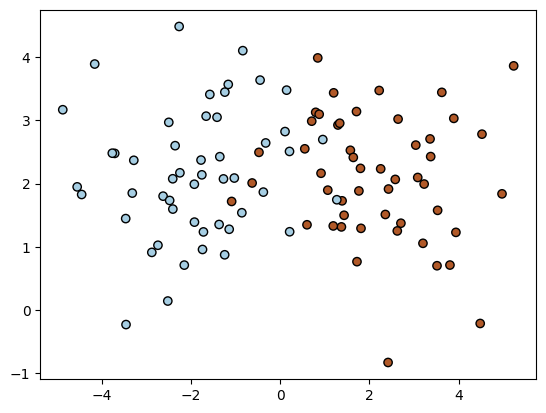

In [ ]:
points_in_category = 50

org_points = np.random.multivariate_normal(mean=np.array([2, 2]), cov=np.array([[2, 0], [0, 1]]), size=points_in_category, check_valid='ignore')
org_labels = np.zeros(points_in_category).reshape(-1, 1)
blue_points = np.random.multivariate_normal(mean=np.array([-2, 2]), cov=np.array([[2, 0], [0, 1]]), size=points_in_category, check_valid='ignore')
blue_labels = np.ones(points_in_category).reshape(-1, 1)

points = np.vstack([org_points, blue_points])
labels = np.vstack([org_labels, blue_labels])

plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='Paired_r', edgecolors='k');
plt.show()

The [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier) (*Stochastic Gradient Descent Classifier*) class using the `loss='log_loss'` parameter implements everything exactly as I described above.

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


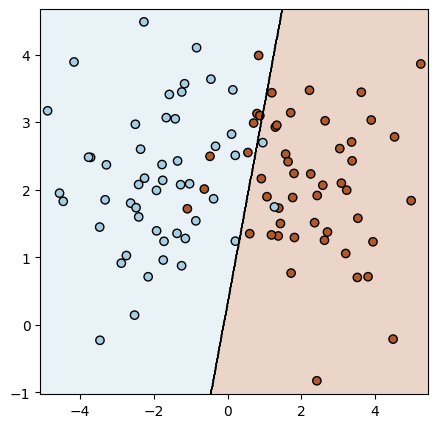

In [ ]:
from sklearn.linear_model import SGDClassifier


# plotting the decision boundary (i stole this off the internet)
def plot_decision_boundary(clf, data, labels, cmap='Paired_r'):
    h = 0.02
    x_min, x_max = data[:,0].min() - 10*h, data[:,0].max() + 10*h
    y_min, y_max = data[:,1].min() - 10*h, data[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(data[:,0], data[:,1], c=labels, cmap=cmap, edgecolors='k');

sgd_model = SGDClassifier(loss='log_loss').fit(points, labels.ravel())
pred_labels = sgd_model.predict(points)

print(pred_labels)

plot_decision_boundary(sgd_model, data=points, labels=labels)

If you don't specify `loss=log_loss`, **you'll get a solution computed via Support Vector Machines**. This will be covered in a future workshop, but the main difference is that Support Vector Machines are more geometry-based while this process is more probability and statistics based; which one is more accurate depends on what you're trying to model.

Alternatively, you can use the [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) class to implement everything. It uses a different solver and runs over the entire dataset, but its approximation of the MLE is generally (though not always) better. However, it still approximates the MLE, albeit using a different optimization method.

Knowing which one to use simply comes with more knowledge. When in doubt, you can always construct both models and choose the one with the higher score (we'll get to evaluation soon).

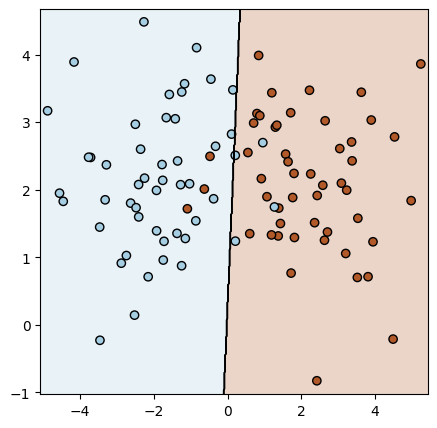

In [ ]:
from sklearn.linear_model import LogisticRegression


logistic_model = LogisticRegression().fit(points, labels.ravel())

plot_decision_boundary(logistic_model, data=points, labels=labels)

## Multiple Labels (Multi-Class Classification)

Binary classification is useful, but oftentimes we want more than two labels. Let's say that instead of dealing with 2 labels, we're now dealing with $k$ labels.

As it turns out, in its simplest form, multi-class classification really just devolves into doing multiple binary classification problems, and then choosing the most likely label at the end.

Two other common approaches are [Multinomial Logistic Regression](https://machinelearningmastery.com/multinomial-logistic-regression-with-python/) and [Naive Bayes Classifiers](https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/), however I won't be presenting them due to time constraints. The derivation of multinomial regression is very similar to what we did above; naive Bayes requires knowledge of probability theory.

### The One-vs-Rest Approach

This is also sometimes called "One-vs-All".

To explain this by way of example, let's say we have a bunch of vector data and the following 3 labels

1. Cat
2. Dog
3. Horse

The One-vs-Rest approach says to perform the following steps:

1. Construct a binary classifier between **Cat** and **Not Cat**. Take the logit of the input with cat.
2. Construct a binary classifier between **Dog** and **Not Dog**. Take the logit of dog.
3. Construct a binary classifier between **Horse** and **Not Horse**. Take the logit of horse.
4. Convert all these logits into a new probability, and then choose the most likely label.

In general, you would construct $k$ separate binary classifiers between "Is [Label]" and "Is Not [Label]", which computes the logit of each label. Then you would convert these into a new probability, and choose the most likely label.

### The One-vs-One Approach

This approach is similar to One-vs-Rest approach, but it constructs more binary classifiers. Using the above 3 labels, the process goes like this.

1. Construct a binary classifier between **Cat** and **Dog**.
2. Construct a binary classifier between **Cat** and **Horse**.
3. Construct a binary classifier between **Dog** and **Horse**.
4. Have each classifier "vote" for a label, and total the number of votes for each label.
5. Choose the label with the most votes.

In general, you will have to construct $\binom{k}{2} = \frac{k(k-1)}{2}$ different binary classifiers. This approach constructs models between every possible pairs of labels, has each model cast a "vote", then chooses the label with the most votes.

Which approach you want to use really depends on the data you're working with and the goal you want to accomplish. One-vs-Rest can be computed faster and produces the most intuitive results, but One-vs-One comes up naturally in its own right.

### Converting logits to probabilities

Regardless of the approach you choose, it's useful to convert all your logits into probability. Let's say at the end you get a logit vector $\vec{L} = (\ell_1, \ell_2, \dots, \ell_k)$, where $\ell_i$ is the logit for the $i$th label. In the same spirit as using the sigmoid function in the binary case, we will use a related function called the **softmax** function, denoted with $\sigma$. The softmax function outputs a vector of probabilities, and the $j$th component in the vector is given by

$$ \sigma ( \vec{L} )_j = \frac{e^{\ell_j}}{\sum_{i=1}^{k} e^{\ell_i}} $$

In other words, applying the exponential function (which makes negative numbers small and positive!) to each component in the vector, then dividing by the sum of every entry. **Doing so causes everything in the vector to add to 1**, which gives us an excellent model for probability among multiple labels. At this point, we classify by choosing the most likely label.

### 3-label 2D Example

Let's say we have the following three labels of data, and we want to construct a multi-class classifier. We will say that $\text{Brown} = 0, \text{Red} = 1, \text{Blue} = 2$.

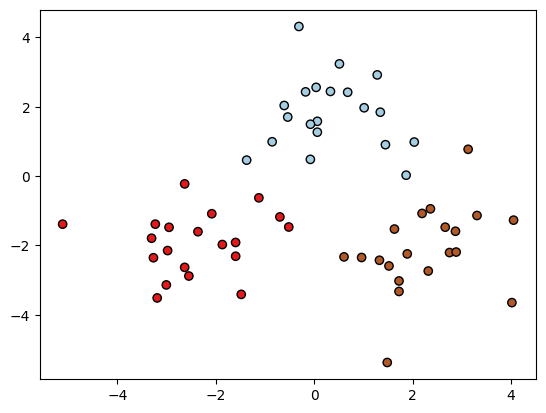

In [ ]:
pts_per_cat = 20

brn_points = np.random.multivariate_normal(mean=np.array([2, -2]), cov=np.array([[1, 0], [0, 1]]), size=pts_per_cat, check_valid='ignore')
brn_labels = np.zeros(pts_per_cat).reshape(-1, 1)
red_points = np.random.multivariate_normal(mean=np.array([-2, -2]), cov=np.array([[1, 0], [0, 1]]), size=pts_per_cat, check_valid='ignore')
red_labels = np.ones(pts_per_cat).reshape(-1, 1)
blu_points = np.random.multivariate_normal(mean=np.array([0, 2]), cov=np.array([[1, 0], [0, 1]]), size=pts_per_cat, check_valid='ignore')
blu_labels = 2 * np.ones(pts_per_cat).reshape(-1, 1)

multi_points = np.vstack([brn_points, red_points, blu_points])
multi_labels = np.vstack([brn_labels, red_labels, blu_labels])

plt.scatter(multi_points[:, 0], multi_points[:, 1], c=multi_labels, cmap='Paired_r', edgecolors='k');
plt.show()

We can implement a **one-vs-rest** model like so

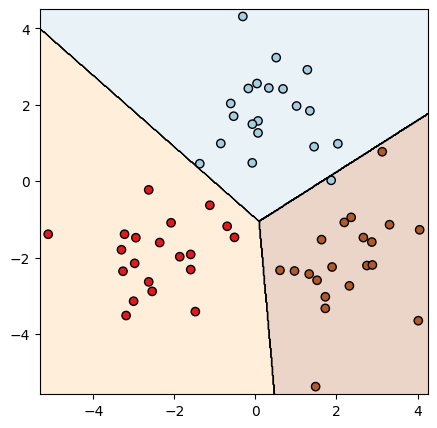

In [ ]:
sgd_multi_model = SGDClassifier(loss='log_loss').fit(multi_points, multi_labels.ravel()) # sgdclassifier implements one-v-rest by default
log_multi_model = LogisticRegression(multi_class='ovr').fit(multi_points, multi_labels.ravel())
# you need to tell LogReg to use OVR; by default it uses multinomial regression, which we unfortunately don't have enough time to cover.

plot_decision_boundary(sgd_multi_model, data=multi_points, labels=multi_labels)

One-vs-one classifiers are usually used in more complex models in intermediate steps. However if you really wanted, you could make one like so

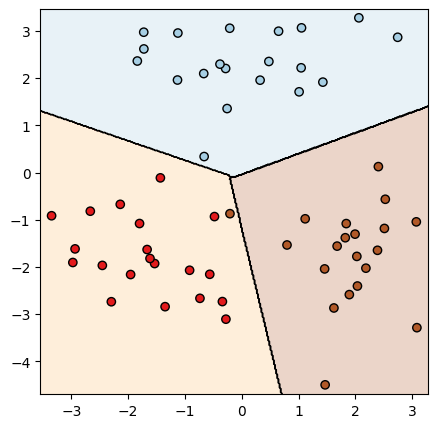

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

log_reg = LogisticRegression() # use any classifier you want really

ovo = OneVsOneClassifier(log_reg)

ovo_model = ovo.fit(multi_points, multi_labels.ravel())

plot_decision_boundary(ovo_model, data=multi_points, labels=multi_labels)

## Evaluating our Classifiers

As with regression, we need some way to evaluate our models. First we'll start with evaluating binary classifiers, then extend our ideas to multi-class classifiers.

To get definitions out of the way, imagine an academic model that detects whether a student was honest (positive label) or cheated (negative label) on an exam. Then
1. True Positive/Negative **(TP/TN)**: Label is correctly assigned.
 - E.g. An honest student is labeled as honest, a cheating student is labeled as cheating.
2. False Positive **(FP)**: Positive label is assigned incorrectly.
 - E.g. A cheating student is labeled as honest.
3. False Negative **(FN)**: Negative label is assigned incorrectly.
 - E.g. An honest student is labeled as a cheater.

### Accuracy

By far the simplest and most intuitive metric, accuracy is simply the ratio between correct predictions over total data. That is,

$$ A = \frac{\text{Correct Predictions}}{\text{Total Inputs}} $$

Accuracy is a pretty good metric if there isn't much penalty in misclassifying a small portion of data, and it extends easily to multi-class classifiers. However, if you're modeling something like cancer detection, then accuracy is a terrible metric to use, since you could classify an at-risk patient as healthy, too high a cost!

Instead, we'll also consider metrics that give more weight to false positives and false negatives.

### Preciseion, Recall, and F1 Score

The **precision** of a classifier is defined as

$$P = \frac{\text{TP}}{\text{TP} + \text{FP}} $$

A high precision means that your model has very little false positives. In the cheating example above, high precision would mean that most students labeled as honest are indeed honest.

The **recall** of a classifier is defined as

$$R = \frac{\text{TP}}{\text{TP} + \text{FN}} $$

A high recall means that your model is very good at classifying positive as positive. In the cheating example above, high recall means that most honest students are labeled as honest.

Usually, there's a tradeoff between precision and recall (that is, improving precision sacrifices some recall, and vice versa). To capture this, we have the $F_1$ score

$$ F_1 = \frac{2PR}{P + R} $$

While this seems weird, this is the [harmonic mean](https://www.mathsisfun.com/numbers/harmonic-mean.html) of precision and recall. The harmonic mean is useful to us because it's very sensitive to small precision and recall values, while less sensitive to large ones. It also gives us a good way to balance our tradeoffs between precision and recall.

When deciding whether to evaluate models based on accuracy or F1 score, you have to ask yourself how bad it is to get a false positive/negative. For example, in the cheating model above: how many cheaters should be allowed to get away? How acceptable is it for an honest student to be called a cheater?

### Evaluating our Binary Models

To showcase these scores on the two classifiers producted in the binary classification section.

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

test_points = 25

org_points_test = np.random.multivariate_normal(mean=np.array([2, 2]), cov=np.array([[2, 0], [0, 1]]), size=test_points, check_valid='ignore')
org_labels_test = np.zeros(test_points).reshape(-1, 1)
blue_points_test = np.random.multivariate_normal(mean=np.array([-2, 2]), cov=np.array([[2, 0], [0, 1]]), size=test_points, check_valid='ignore')
blue_labels_test = np.ones(test_points).reshape(-1, 1)

points_test = np.vstack([org_points_test, blue_points_test])
labels_test = np.vstack([org_labels_test, blue_labels_test])


print('SGD Model Accuracy Score:', accuracy_score(labels_test, sgd_model.predict(points_test)))
print('Logistic Model Accuracy Score:', accuracy_score(labels_test, logistic_model.predict(points_test)))
print('SGD Model F1 Score:', f1_score(labels_test, sgd_model.predict(points_test)))
print('Logistic Model F1 Score:', f1_score(labels_test, logistic_model.predict(points_test)))

SGD Model Accuracy Score: 0.98
Logistic Model Accuracy Score: 0.94
SGD Model F1 Score: 0.9803921568627451
Logistic Model F1 Score: 0.9387755102040817


### Evaluating Multi-class Classifiers

If we don't care too much about the consequences of misclassifying, then accuracy remains a very good metric. It's implemented exactly like above.

If we do care about the consequences of mislabeling, then things become a bit trickier. We can have false positives and false negatives across many different labels, so it's not very clear how to condense this in a single metric.

However, we can summarize all this information through a confusion matrix, whose entires tells us how we misclassified (except the diagonal, which represents correct classifications).

In sklearn, the confusion matrix is interpreted like so: $C_{ij} = $ Number of observations in label $i$ predicted to be in label $j$. We can compute the confusion matrix of a model like so

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(multi_labels, sgd_multi_model.predict(multi_points)))

[[20  0  0]
 [ 2 18  0]
 [ 0  1 19]]


There's no clear-cut answer from here on what to do; you would need to decide the consequences of misclassifying each individual label, and then choose an appropriate score and adjust your model appropriately. Due to the ambiguity, I'll leave this topic as further reading. [Here's](https://medium.com/apprentice-journal/evaluating-multi-class-classifiers-12b2946e755b) [some](https://www.kaggle.com/code/nkitgupta/evaluation-metrics-for-multi-class-classification) [additional sources](https://stats.stackexchange.com/questions/44261/how-to-determine-the-quality-of-a-multiclass-classifier).

# Principal Components Analysis

A change of pace: instead of producing models with data, we'll tackle the problem of reducing the amount of features of a dataset without actually losing any information. This is useful because each weight corresponds to a feature (except the bias term), so reducing your features is the same as reducing the number of weights you need to compute.

## The Setup

Say we're given a bunch of input features that we're trying to make a model out of. But for whatever reason, the features are too many or too problematic (model takes a long time to make, features are highly correlated, etc.)

One approach is to delete some of our features, however this is a bad idea for a few reasons
1. Deleting data can lead us to tunnel vision and cause worse models.
2. It's not always clear what to delete.
3. If the features are highly correlated with each other, then deleting them won't solve anything.

So we need to develop a new strategy that answers the question: *how can we reduce the number of features without damaging the integrity of our data?*

**Principal Components Analysis** does precisely this. The idea of PCA is that it looks at the *distribution* of our data and uses it to perform a change of basis on our dataset. This basis is special for two reasons.

1. PCA changes the basis of our dataset so that the features are uncorrelated with each other. Another way to put it: **PCA redefines the components to have zero correlation.**
2. The basis vectors are orthogonal to each other.

So combining facts (1) and (2), we get the following reason why PCA is important to us

3. Under the basis revealed by PCA, **each feature controls one and only one dimension of linear randomness**.

![PCA](https://images.spiceworks.com/wp-content/uploads/2023/09/25113853/pasted-image-0-21.png)

*Normally, the above dataset is defined under the standard basis (1, 0) and (0, 1). PCA reveals a new basis and how much variance occurs along each basis vector (represented by the length of the vector). Moreover, the basis vectors are orthogonal and control only one dimension of linear randomness.*

We can therefore perform data reduction by dropping features that contribute zero or a very small amount of randomness.

Note that PCA doesn't guarantee that the new dataset will have independent features. It only guarantees that the new dataset will have *uncorrelated* features. Unfortunately, 0 correlation doesn't imply independence.

(If you don't believe me, consider standard normal $Z \sim \mathcal{N}(0, 1)$ and $Z^2$. Clearly these depend on each other heavily, yet they have 0 covariance. See if you can convince yourself why.)

## How to find this basis?

As it turns out, we can turn to [diagonalization](https://textbooks.math.gatech.edu/ila/diagonalization.html) from linear algebra to reveal this basis. Suppose we have a data matrix given by the features $X_1, X_2, \dots, X_p$. Our first goal is to perform a change of basis so that these features are uncorreleated. First, we recall the covariance between two random variables

$$\mathrm{Cov}(X, Y) = \mathbb{E}\left[ (X - \mu_{X}) (Y - \mu_Y) \right] $$

Here, $\mathbb{E}$ denotes [expectation](https://www.investopedia.com/terms/e/expected-value.asp#:~:text=Understanding%20Expected%20Value,-The%20EV%20of&text=Essentially%2C%20the%20EV%20is%20the,mean%20or%20the%20first%20moment), and $\mu$ denotes mean. Two random variables are uncorrelated if and only if their covariance is 0, and recall that covariance is a measurement of linear dependence (in terms of randomness).

We can use covariance to find the **covariance matrix** of our features. Let $C$ denote this covariance matrix, and we see that

$$ C_{ij} = \mathrm{Cov}(X_i, X_j) $$

That is, the $ij$ component is the covariance between the $i$th and $j$th features. Notice that this will produce a [symmetric matrix](https://mathworld.wolfram.com/SymmetricMatrix.html), meaning $C_{ij} = C_{ji}$.

Why do we care about the covariance matrix? Our goal is to find a basis so that our features are uncorrelated to each other. To do so, we turn to the world of diagonalization. Since $C$ is symmetric, it is always diagonalizable. Moreover, the eigenvectors of a symmetric matrix are always orthogonal.

Hence, we see that *the basis we're after is nothing more than the eigenvectors of the covariance matrix of our data*. (If you believe that symmetric matrices always give orthogonal eigenvectors, then see if you can convince yourself why!) The amount of variance that each eigenvector controls is given by its respective **eigenvalue**. We call these eigenvectors the **principal components** of our dataset.

## Example of PCA

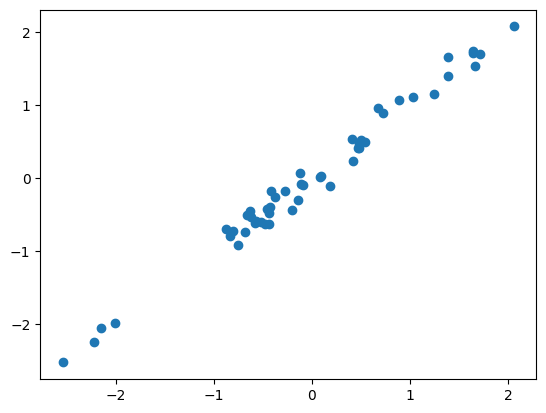

In [ ]:
# putting this in a pandas dataframe to show how this can be done in general
raw_pca_data = np.random.multivariate_normal(mean=np.zeros(2), cov=np.array([[1, 1.01], [1.01, 1]]), size=50, check_valid='ignore')
pca_df = pd.DataFrame(data=raw_pca_data, columns=['X', 'Y'], index=np.arange(50))

plt.scatter(pca_df['X'], pca_df['Y'])

We can reveal the principal components ourselves using existing methods from numpy and pandas. Fortunately for us, there are well-known algorithms that can diagonalize symmetric matrices; moreover, they're numerically stable. Numpy provides one called [eigh](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html) (H for Hermitian, and Hermitian = Equal to its conjugate transpose. All symmetric matrices are Hermitian)

In [ ]:
from numpy.linalg import eigh

cov = pca_df.cov()

var, pc = eigh(cov) # returns two things: 1st is eigenvalues (variance) in ascending order, 2nd is corresponding eigenvectors (principal components)
var, pc = var[::-1], np.fliplr(pc) # reverse the order so largest principal components come first

print(var, pc, sep='\n')

[2.13603169 0.00838306]
[[ 0.70399141 -0.71020849]
 [ 0.71020849  0.70399141]]


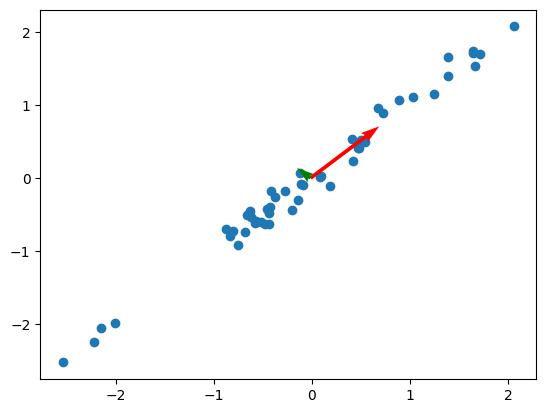

In [ ]:
# plotting the principal components
# too lazy to expand the array so i'm just abusing broadcasting

center = pca_df.mean(axis=0).values.reshape(1, -1)
center = np.ones(2).reshape(-1, 1) * center

rescale = np.array([1, 50]) * var / var.sum()

plt.scatter(pca_df['X'], pca_df['Y'], zorder=0)
plt.quiver(
    center[:, 0], center[:, 1],
    rescale * pc[0, :],
    rescale * pc[1, :],
    color=['r', 'g'], scale=1, angles='xy', scale_units='xy', zorder=1
)

The second principal component contributes very little to our data, so we can drop it and preverse most of our integrity.

In [ ]:
# performing a change of basis is just multiplying by the components we care about
P = pc[:, 0]
P = P.reshape(-1, 1) # just converting it back to a matrix

new_data = pca_df @ P
print(f'Preserving {100 * var[0]/var.sum()}% of our data by using first principal component.')

new_data.head()

Preserving 99.63230384844326% of our data by using first principal component.


,0
0,0.425569
1,0.072046
2,1.907107
3,0.592556
4,-1.823940


And to get our data back in its original features, we can multiply by the transpose (since the eigenvectors are orthogonal, the transpose is the inverse).

          0         1
0 -0.304830 -0.296964
1 -0.051605 -0.050274
2 -1.366039 -1.330788
3 -0.424441 -0.413488
4  1.306467  1.272754


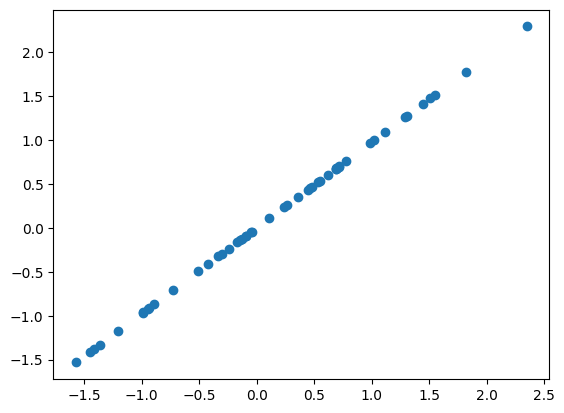

In [ ]:
orig_data = new_data @ P.T

print(orig_data.head())

plt.scatter(orig_data[0], orig_data[1])

In general, the amount of data you preserve is given by

$$\text{% of Data Preserved} = \frac{\text{Sum of eigenvalues of kept principal components}}{\text{Sum of all eigenvalues}} $$

[sklearn also implements PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA), and it gives you all the info above (and a bit more). Although it uses a slightly different method: it finds the SVD of the data matrix instead of diagonalizing the covariance matrix. It also assumes that you've normalized your data so that each column has length 1. Both ways are very closely related to each other and will yield approximately same answer.

Hereinafter, I recommend using sklearn's PCA module because it's far easier and is slightly more numerically stable. eigh is a good algorithm, but SVD algorithms are generally more numerically stable than diagonalization algorithms.

[[-0.71753976 -0.69651754]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


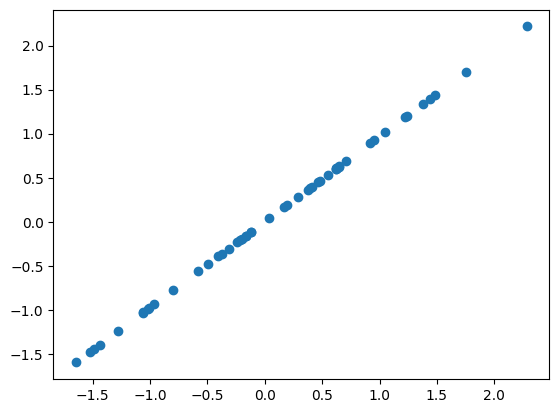

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

pca = PCA(n_components=1).fit(normalize(pca_df))
sk_data = pca.transform(pca_df)
print(pca.components_)

orig_sk_data = sk_data @ pca.components_

plt.scatter(orig_sk_data[:, 0], orig_sk_data[:, 1])